# A. Nonlinear Transformation

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from scipy.stats import linregress
from sklearn.metrics import r2_score

In [7]:
data = pd.read_csv('1_china_gdp.csv')
data.head

<bound method NDFrame.head of     Year         Value
0   1960  5.918412e+10
1   1961  4.955705e+10
2   1962  4.668518e+10
3   1963  5.009730e+10
4   1964  5.906225e+10
5   1965  6.970915e+10
6   1966  7.587943e+10
7   1967  7.205703e+10
8   1968  6.999350e+10
9   1969  7.871882e+10
10  1970  9.150621e+10
11  1971  9.856202e+10
12  1972  1.121598e+11
13  1973  1.367699e+11
14  1974  1.422547e+11
15  1975  1.611625e+11
16  1976  1.516277e+11
17  1977  1.723490e+11
18  1978  1.483821e+11
19  1979  1.768565e+11
20  1980  1.896500e+11
21  1981  1.943690e+11
22  1982  2.035496e+11
23  1983  2.289502e+11
24  1984  2.580821e+11
25  1985  3.074796e+11
26  1986  2.988058e+11
27  1987  2.713498e+11
28  1988  3.107222e+11
29  1989  3.459575e+11
30  1990  3.589732e+11
31  1991  3.814547e+11
32  1992  4.249341e+11
33  1993  4.428746e+11
34  1994  5.622611e+11
35  1995  7.320320e+11
36  1996  8.608441e+11
37  1997  9.581594e+11
38  1998  1.025277e+12
39  1999  1.089447e+12
40  2000  1.205261e+12
41  

In [8]:
x = data['Year']
y = data['Value']

# Get slope and intercept
y_log = np.log(y)
slope, intercept, rvalue, pvalue, stderr = linregress(x, y_log)

# Predict using the modified equation that is suitable for nonlinear data
y_pred = np.exp(intercept) * np.exp(slope * x)

# Compute r2 again
r2 = r2_score(y, y_pred)
print(f"The coefficient of determination or r squared is {r2}")

The coefficient of determination or r squared is 0.7663622396055385


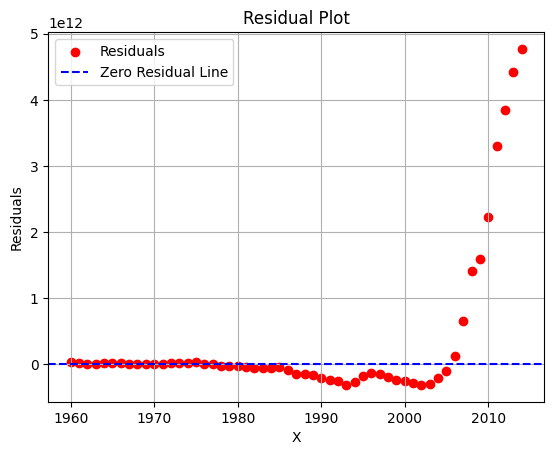

In [9]:
residual = y - y_pred

# Residual plot
plt.scatter(x, residual, c='red', label='Residuals')
plt.axhline(y=0, color='blue', linestyle='--', label='Zero Residual Line')
plt.xlabel('X')
plt.ylabel('Residuals')
plt.legend()
plt.title('Residual Plot')
plt.grid(True)
plt.show()

# B. Categorical Encoding

In [16]:
import category_encoders as ce
import pandas as pd

df = pd.read_csv('2_melb_data.csv')
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13580 entries, 0 to 13579
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Suburb         13580 non-null  object 
 1   Address        13580 non-null  object 
 2   Rooms          13580 non-null  int64  
 3   Type           13580 non-null  object 
 4   Price          13580 non-null  float64
 5   Method         13580 non-null  object 
 6   SellerG        13580 non-null  object 
 7   Date           13580 non-null  object 
 8   Distance       13580 non-null  float64
 9   Postcode       13580 non-null  float64
 10  Bedroom2       13580 non-null  float64
 11  Bathroom       13580 non-null  float64
 12  Car            13518 non-null  float64
 13  Landsize       13580 non-null  float64
 14  BuildingArea   7130 non-null   float64
 15  YearBuilt      8205 non-null   float64
 16  CouncilArea    12211 non-null  object 
 17  Lattitude      13580 non-null  float64
 18  Longti

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,...,1.0,1.0,202.0,NaN,NaN,Yarra,-37.7996,144.9984,Northern Metropolitan,4019.0
1,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,...,1.0,0.0,156.0,79.0,1900.0,Yarra,-37.8079,144.9934,Northern Metropolitan,4019.0
2,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,...,2.0,0.0,134.0,150.0,1900.0,Yarra,-37.8093,144.9944,Northern Metropolitan,4019.0
3,Abbotsford,40 Federation La,3,h,850000.0,PI,Biggin,4/03/2017,2.5,3067.0,...,2.0,1.0,94.0,NaN,NaN,Yarra,-37.7969,144.9969,Northern Metropolitan,4019.0
4,Abbotsford,55a Park St,4,h,1600000.0,VB,Nelson,4/06/2016,2.5,3067.0,...,1.0,2.0,120.0,142.0,2014.0,Yarra,-37.8072,144.9941,Northern Metropolitan,4019.0


In [17]:
df.dropna(axis=0)

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
1,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,...,1.0,0.0,156.0,79.00,1900.0,Yarra,-37.80790,144.99340,Northern Metropolitan,4019.0
2,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,...,2.0,0.0,134.0,150.00,1900.0,Yarra,-37.80930,144.99440,Northern Metropolitan,4019.0
4,Abbotsford,55a Park St,4,h,1600000.0,VB,Nelson,4/06/2016,2.5,3067.0,...,1.0,2.0,120.0,142.00,2014.0,Yarra,-37.80720,144.99410,Northern Metropolitan,4019.0
6,Abbotsford,124 Yarra St,3,h,1876000.0,S,Nelson,7/05/2016,2.5,3067.0,...,2.0,0.0,245.0,210.00,1910.0,Yarra,-37.80240,144.99930,Northern Metropolitan,4019.0
7,Abbotsford,98 Charles St,2,h,1636000.0,S,Nelson,8/10/2016,2.5,3067.0,...,1.0,2.0,256.0,107.00,1890.0,Yarra,-37.80600,144.99540,Northern Metropolitan,4019.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12205,Whittlesea,30 Sherwin St,3,h,601000.0,S,Ray,29/07/2017,35.5,3757.0,...,2.0,1.0,972.0,149.00,1996.0,Whittlesea,-37.51232,145.13282,Northern Victoria,2170.0
12206,Williamstown,75 Cecil St,3,h,1050000.0,VB,Williams,29/07/2017,6.8,3016.0,...,1.0,0.0,179.0,115.00,1890.0,Hobsons Bay,-37.86558,144.90474,Western Metropolitan,6380.0
12207,Williamstown,2/29 Dover Rd,1,u,385000.0,SP,Williams,29/07/2017,6.8,3016.0,...,1.0,1.0,0.0,35.64,1967.0,Hobsons Bay,-37.85588,144.89936,Western Metropolitan,6380.0
12209,Windsor,201/152 Peel St,2,u,560000.0,PI,hockingstuart,29/07/2017,4.6,3181.0,...,1.0,1.0,0.0,61.60,2012.0,Stonnington,-37.85581,144.99025,Southern Metropolitan,4380.0


In [18]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['Suburb'] = le.fit_transform(df['Suburb'])
df['Type'] = le.fit_transform(df['Type'])
df['Method'] = le.fit_transform(df['Method'])
df['SellerG'] = le.fit_transform(df['SellerG'])
df['CouncilArea'] = le.fit_transform(df['CouncilArea'])
df['Regionname'] = le.fit_transform(df['Regionname'])

In [19]:
df.Date = pd.to_datetime(df.Date,format='%d/%m/%Y')

df['month'] = df.Date.dt.month
df['year'] = df.Date.dt.year

df.drop(['Date'],axis=1,inplace=True)

In [20]:
df = df.drop('Address',axis=1)

In [21]:
df.corr()['Price'].sort_values()

Type            -0.414566
YearBuilt       -0.323617
Lattitude       -0.212934
Distance        -0.162522
Suburb          -0.135830
CouncilArea     -0.063653
SellerG         -0.052109
Propertycount   -0.042153
Method          -0.037741
year             0.003993
month            0.027969
Landsize         0.037507
Regionname       0.079109
BuildingArea     0.090981
Postcode         0.107867
Longtitude       0.203656
Car              0.238979
Bathroom         0.467038
Bedroom2         0.475951
Rooms            0.496634
Price            1.000000
Name: Price, dtype: float64

In [22]:
df = df.dropna()

In [23]:
X = df.drop('Price',axis=1)
y = df['Price']
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=7)
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [28]:
from sklearn.neighbors import KNeighborsRegressor

In [29]:
model= KNeighborsRegressor()
model.fit(X_train_scaled, y_train)

KNeighborsRegressor()

In [30]:
from sklearn.metrics import mean_absolute_error
y_pred=model.predict(X_test_scaled)
print(r2_score(y_test,y_pred))
print(mean_absolute_error(y_test,y_pred))
print(np.sqrt(mean_absolute_error(y_test,y_pred)))

0.737030958890134
211047.49853587116
459.3990624020375


# C. Discretization

In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import seaborn as sns

In [32]:
titanic=pd.read_csv('3_train.csv')
titanic.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


In [33]:
num_features=titanic.describe().columns.tolist()

In [34]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
 titanic[num_features], titanic["Transported"], test_size=0.4,
 random_state=0)

In [35]:
X_train.head()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
6849,39.0,197.0,0.0,2401.0,0.0,0.0
847,32.0,2492.0,0.0,NaN,136.0,4.0
1442,14.0,0.0,0.0,0.0,0.0,0.0
333,20.0,0.0,0.0,558.0,0.0,230.0
6705,36.0,21.0,0.0,844.0,0.0,0.0


In [36]:
X_train.fillna(X_train.median(),inplace=True)
X_test.fillna(X_train.median(),inplace=True)

In [37]:
X_test.head()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
3601,16.0,0.0,0.0,623.0,40.0,209.0
6057,2.0,0.0,0.0,0.0,0.0,0.0
2797,31.0,517.0,1.0,301.0,60.0,4.0
7110,14.0,653.0,0.0,4.0,0.0,0.0
8579,30.0,0.0,0.0,0.0,0.0,0.0


In [38]:
X_train_copy=X_train.copy()
X_test_copy=X_test.copy()

In [39]:
from feature_engine.discretisation import EqualWidthDiscretiser

In [40]:
widthDiscretiser=EqualWidthDiscretiser(bins=10,variables=["Age"])

In [41]:
widthDiscretiser.fit(X_train_copy)
widthDiscretiser.binner_dict_

{'Age': [-inf,
  7.9,
  15.8,
  23.700000000000003,
  31.6,
  39.5,
  47.400000000000006,
  55.300000000000004,
  63.2,
  71.10000000000001,
  inf]}

In [42]:
X_train_copy=widthDiscretiser.transform(X_train_copy)
X_test_copy=widthDiscretiser.transform(X_test_copy)
X_test_copy.head()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
3601,2,0.0,0.0,623.0,40.0,209.0
6057,0,0.0,0.0,0.0,0.0,0.0
2797,3,517.0,1.0,301.0,60.0,4.0
7110,1,653.0,0.0,4.0,0.0,0.0
8579,3,0.0,0.0,0.0,0.0,0.0


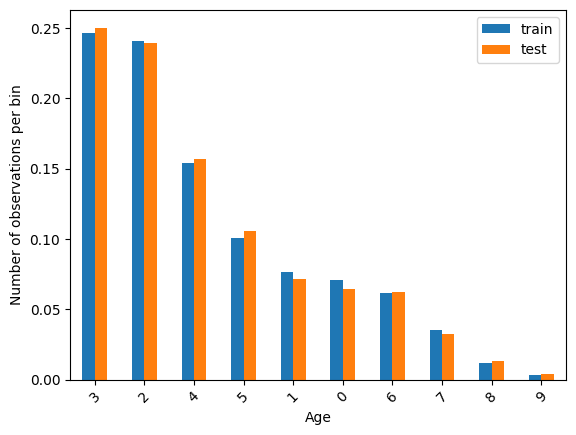

In [43]:
t1 = X_train_copy['Age'].value_counts() / len(X_train_copy)
t2 = X_test_copy['Age'].value_counts() / len(X_test_copy)
tmp = pd.concat([t1, t2], axis=1)
tmp.columns = ['train', 'test']
tmp.plot.bar()
plt.xticks(rotation=45)
plt.ylabel('Number of observations per bin');

In [44]:
def make_plot(X,X_copy,variable):
    plt.figure(figsize=(12,6))
    sns.countplot(x=X[variable])
    plt.title("Before Binning ")
    plt.show()
    plt.figure(figsize=(12,6))
    sns.countplot(x=X_copy[variable])
    plt.title("After Binning ")
    plt.show()

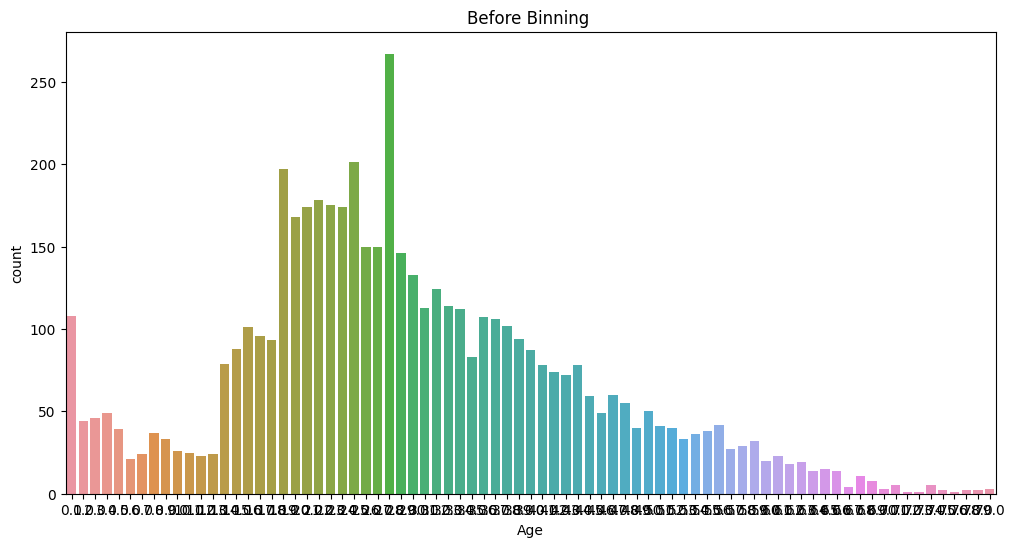

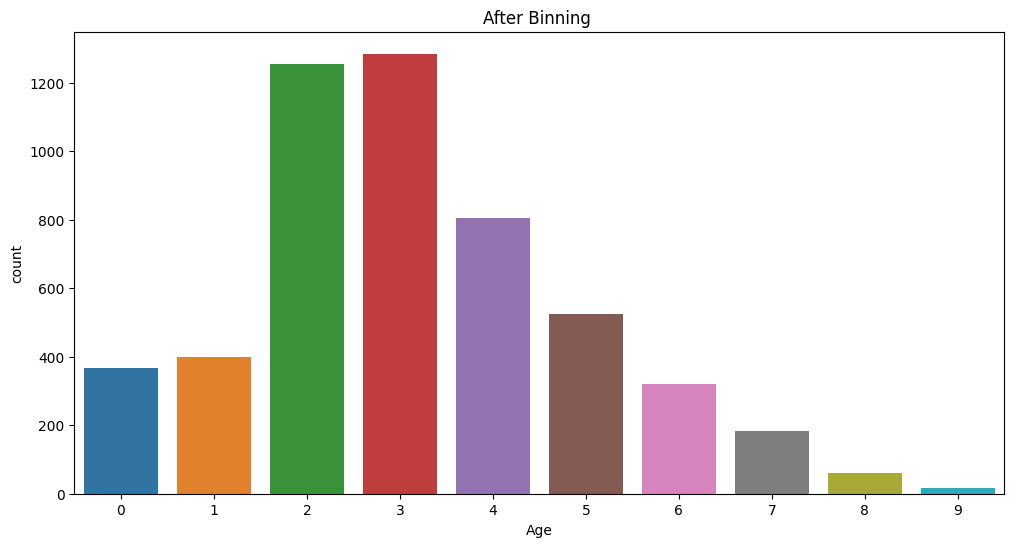

In [45]:
make_plot(X_train,X_train_copy,"Age")